In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification
from sklearn.neighbors import KNeighborsClassifier as KNC
from matplotlib.colors import ListedColormap
%matplotlib inline

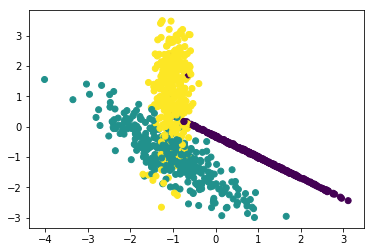

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

接着我们用KNN来拟合模型，我们选择K=15，权重为距离远近。

In [4]:
clf = KNC(n_neighbors=15,weights='distance')
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='distance')

最后，我们可视化一下看看我们预测的效果如何?

In [5]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [6]:
#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

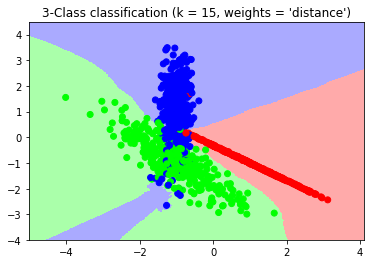

In [10]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )